# High School with Python


Use the math you already know, or are just learning, to get stronger in Python.  

Use the Python you already know, or learned recently, to teach yourself more math.

Climb the spiral staircase to greater mastery of today's tools and technologies.

* Age range:  Open to anyone wanting to combine working out in Python, learning the language, while using high school level math topics as "grist for the mill".  

* Format:  Home school format over Zoom. BYOD (bring your own device). Hands on.  Be willing to install new software to your local machine.  Be willing to share your screen on Zoom.  Be willing to open free accounts in the cloud, and paid accounts optionally.

* Make your own Jupyter Notebooks and share them with your peers.

* Collaborate on coding projects.

Are you reading this as a PDF document?  Then chances are, it was generated by an operating system level process looking something like this:

In [1]:
! jupyter nbconvert --to webpdf class_proposal.ipynb 

[NbConvertApp] Converting notebook class_proposal.ipynb to webpdf
[NbConvertApp] Building PDF
[NbConvertApp] PDF successfully created
[NbConvertApp] Writing 278250 bytes to class_proposal.pdf


Getting Jupyter Notebooks to render as PDFs, including with $\LaTeX$ and Unicode emoji, is cutting edge tech at the time of this writing (Fall, 2021).

As a webpdf, this document has no page breaks, so good luck trying to print it out.  Adding page breaks to webpdfs is a good example of an ongoing community project.

In [2]:
import sys
print(sys.version)

3.7.9 (default, Aug 31 2020, 07:22:35) 
[Clang 10.0.0 ]


## Examples of high school math topics:

* Functions and Relations
* Trigonometry
* Cryptography
* Pascal's Triangle and Binomial Distribution
* Figurate and Polyhedral Number Sequences
* $\LaTeX$ for Math Expressions
* Publishing to the Web or other eFormats
* Complex Numbers (complex plane)
* Vectors and Matrices (spatial geometry)
* Group and Number Theory topics
* Mandelbrot Set (fractals)
* Calculus (differentiating and integrating)

### Trigonometry

Plotting sine waves in color requires very little code when you start with numpy and pandas.  But then we're already inside a Jupyter Notebook, which you may think of as your new desktop workspace.  In the context of JupyterLab, you will have easy access to a Python console, interactive editing, other file type viewing.

In [3]:
import numpy as np
import pandas as pd

%matplotlib inline

domain = np.linspace(-10, 10, 400)  # give me 400 points evenly spaced from -10 to 10
cos_wave = np.cos(domain)           # cos(x) where x is every one of those 400 points
sin_wave = np.sin(domain)           # ditto sin(x)

tabular = pd.DataFrame({"domain": domain, "cosine": cos_wave, "sine": sin_wave}) # build a table

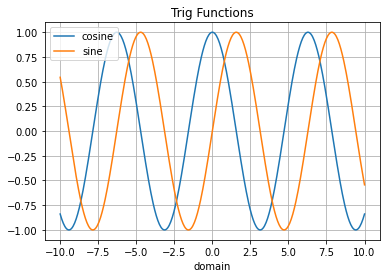

In [4]:
tabular.plot(x="domain", y=["cosine", "sine"], title="Trig Functions", grid=True); # plot!

### Pascal's Triangle

The Python *generator* below yields successive rows of Pascal's Triangle.  

Generators are a special construct in Python.  They're similar to functions but get nudged forward, to a next ```yield``` statement is encountered, and restarting from wherever the program last yielded.  A generator does not forget its internal state, between nudgings.

In [5]:
def pascal():
    row = np.array([1])
    while True:
        yield row
        row = np.append(row, 0) + np.insert(row, 0, 0)

In [6]:
iterator = pascal()
for _ in range(10):
    print(next(iterator))

[1]
[1 1]
[1 2 1]
[1 3 3 1]
[1 4 6 4 1]
[ 1  5 10 10  5  1]
[ 1  6 15 20 15  6  1]
[ 1  7 21 35 35 21  7  1]
[ 1  8 28 56 70 56 28  8  1]
[  1   9  36  84 126 126  84  36   9   1]


Lets get some more rows and plot the last one to see what we get.

In [7]:
row = next(iterator)  # run this multiple times

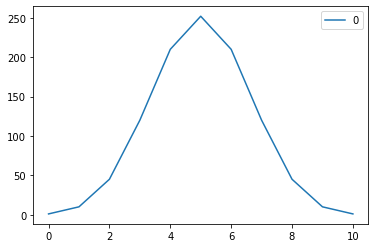

In [8]:
%matplotlib inline
binomial_distro = pd.DataFrame(row).plot()

### Cryptography

Topics left on the back burner in the 1900s, become more front burner in the 2000s, with the rise of the internet and the need for stranger-to-stranger public key cryptography.

Instead of rushing through the primes versus composite distinction, and giving short shrift to Modulo Arithmetic, we must now take a deeper dive, with notions of totient and totative.

The totatives of positive integer N is the set integers less than N, down to 1, including 1, that have no factors in common with N, other than 1.

In [9]:
from math import gcd

def totatives(N):
    return [n for n in range(1, N) if gcd(n, N) == 1]

In [10]:
totatives(12)

[1, 5, 7, 11]

In [11]:
print(totatives(100))

[1, 3, 7, 9, 11, 13, 17, 19, 21, 23, 27, 29, 31, 33, 37, 39, 41, 43, 47, 49, 51, 53, 57, 59, 61, 63, 67, 69, 71, 73, 77, 79, 81, 83, 87, 89, 91, 93, 97, 99]


Do not confuse totatives of N with prime factors of N, another topic we will be sure to take up.

The number of totatives a number N has, is called its totient.  Euler sometimes used $\phi$ for his totient function.

In [12]:
def totient(N):
    return len(totatives(N))

In [13]:
totient(12)

4

In [14]:
totient(100)

40

RSA public key cryptography is these days often only taken up in computer science after high school, but in this curriculum we bring in enough Group and Number Theory topics to make the RSA algorithm a door-opening application.

In [15]:
from primes import rsacrypto_test

Generating:  p,q
Generating:  u
Generating:  d
<_RSAobj @0x11fe45ed0 n(1024),e,d,p,q,u,private>


Python's 3rd party community provides some useful cryptography packages.  Lets used one.

The way RSA works is everybody publishes a huge composite number N, like an address, which has two prime factors p, q that each person stores secretly.  

There's no reasonable way to work backwards to get from the public composite number N, to its component primes (p, q), given our current understanding of Number Theory.

Bob encrypts a message to Alice, by raising it in chunks to some power, with Alice's public key as the modulus. 

In [16]:
p = rsacrypto_test.p
p

10143484660960909496574203559963732351379668480398115689379726394764643051469890326917898127936845416340639123666445569052067236703130973857760804866808901

In [17]:
q = rsacrypto_test.q
q

11886322643260018061749418993691872505432793068093221009422968764285911529749956501362593762892446238588256425375246517156759256307182624736703019800958261

In [18]:
rsacrypto_test.e # raise to 17th power modulo p*q 

17

Alice's secret "DNA-like" components then spring into action and decipher Bob's message, by raising it to some still higher power, governed by the totient of p * q.  

Alice can only decrypt messages intended for Alice (her public key address), and so on.  

This system has worked well and is built in to every web browser as a way to handshake with public keys, in order to shift to a faster private key, once a trusted connection has been established.

In [19]:
crypt = rsacrypto_test.rsaobj  # results of generating p, q, d

plain_text = b"no one will be able to read this without p, q"

In [20]:
cipher_text = crypt.encrypt(plain_text, b'K')[0]

print(crypt.decrypt(cipher_text))

b'no one will be able to read this without p, q'


### Polynomials

If 1 is to a longer $\phi$, as $\phi$ is to a still longer $1+\phi$, then what is $\phi$? 

That question may be expressed as a solvable polynomial, yield a specific number, called the Golden Mean.

Notice $\LaTeX$ is being used to make our math expressions.

By doing the same thing to both sides, as we do with polynomials, we may simplify:

$$
1/\phi = \phi/(\phi + 1)  \\
(\phi + 1)/\phi = \phi  \\
(\phi + 1) = \phi^{2}  \\
0 = \phi^{2} - (\phi + 1) \\  
\phi^{2} - \phi - 1 = 0 \\
$$

And next, we may solve this equation, using ```sympy```.

In [21]:
from sympy import init_session
init_session()

IPython console for SymPy 1.7.1 (Python 3.7.9-64-bit) (ground types: gmpy)

These commands were executed:
>>> from __future__ import division
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at https://docs.sympy.org/1.7.1/



In [22]:
𝜙 = symbols('𝜙')

In [23]:
from sympy.solvers import solve

In [24]:
solve(𝜙**2 - 𝜙 - 1, 𝜙)

In [25]:
sol = solve(𝜙**2 - 𝜙 - 1, 𝜙)
sol[1].evalf(30)

This meaning for $\phi$ is distinct from Euler's use of it for "totient function" above.  Math symbols get recycled in may pick up many meanings from different contexts.

The Golden Mean shows up everywhere in geometry.

<a data-flickr-embed="true" href="https://www.flickr.com/photos/kirbyurner/51480930005/in/dateposted-public/" title="pentatrig"><img src="https://live.staticflickr.com/65535/51480930005_c877e89588_o.jpg" width="320" height="290" alt="pentatrig"></a><script async src="//embedr.flickr.com/assets/client-code.js" charset="utf-8"></script>

## Python


Python is a computer language, started in the Netherlands by Guido van Rossum in the 1990s, and still evolving.

<a data-flickr-embed="true" href="https://www.flickr.com/photos/kirbyurner/3213390685/in/album-72157612943105800/" title="PSF Approved"><img src="https://live.staticflickr.com/3421/3213390685_6807cb4693_m.jpg" width="211" height="71" alt="PSF Approved"></a><script async src="//embedr.flickr.com/assets/client-code.js" charset="utf-8"></script>
 

## Examples of Python topics:
* Using Python like a scientific graphing calculator
* Data Wrangling in Python (spreadsheets and databases)
* Jupyter Notebooks (like here)
* Coding with Functions (links to math)
* Object Oriented Programming (OOP)
* Dimensions of Python: keywords, built-ins, special names, library, 3rd party
* ASCII and Unicode

Surrounding Python is the broader landscape of the computerized office, with many components in
the cloud such as:

## Cloud Resources

* Google Colab (Notebooks)
* Replit (Computer Languages)
* Github (source under version control)
* PythonAnywhere (cloud hosting)
* Our Home Base Text (HBT)

The list continues.  With the exception of PythonAnywhere, all of the above are free.

But what if we're not always connected to the internet, and what about working locally in a personal workspace, with files on the local computer (such as a laptop or desktop)?

That's where downloading and installation comes in.  We focus on beefing up your local computer quite a bit, and do not depend solely on cloud resources.

## Local Resources:

* JupyterLab (local version)
* Python / I-Python (the language itself)
* Git (source code under version control)
* Flask or Django or... (web framework)
* pip and conda (for downloading and installing)
* local copy of Home Base Text